# **Importing Libraries and Loading Data**

In [ ]:

import json, os
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_recall_curve, roc_curve,
                             confusion_matrix, classification_report)
from joblib import dump, load

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Make a directory for Kaggle
!mkdir -p ~/.kaggle

# Move kaggle.json into the directory
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.21GB/s]


In [ ]:
import zipfile

zip_ref=zipfile.ZipFile("/content/creditcardfraud.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import pandas as pd
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X=df.drop(columns=['Class'])
y=df['Class']

# **Data Processing**

In [ ]:
from sklearn.model_selection import train_test_split
if "Time" in df.columns:
    df = df.sort_values("Time").reset_index(drop=True)
    split_idx = int(0.8 * len(df))
    train_df = df.iloc[:split_idx]
    val_df   = df.iloc[split_idx:]
else:
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["Class"], random_state=42)


In [ ]:
X_train = train_df.drop(columns=["Class"])
y_train = train_df["Class"].astype(int).values
X_val   = val_df.drop(columns=["Class"])
y_val   = val_df["Class"].astype(int).values


NameError: name 'train_df' is not defined

In [ ]:
print(X_train.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
3   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
4   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
3  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
4  0.260314 -0.568671  ...  0.084968 -0.208254 -0.559825 -0.026398 -0.371427   

        V25       V26       V27 

In [ ]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


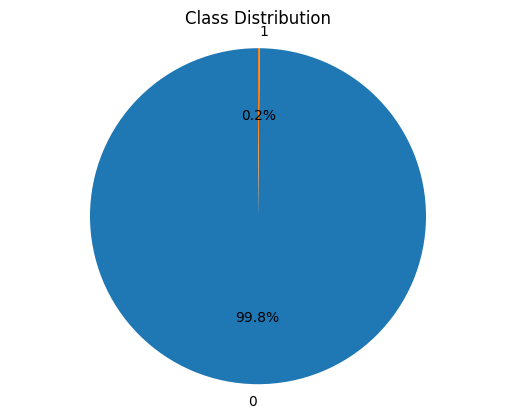

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count values for Class
class_counts = df['Class'].value_counts()

# Plot pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution")
plt.axis('equal')  # Make it a circle
plt.show()


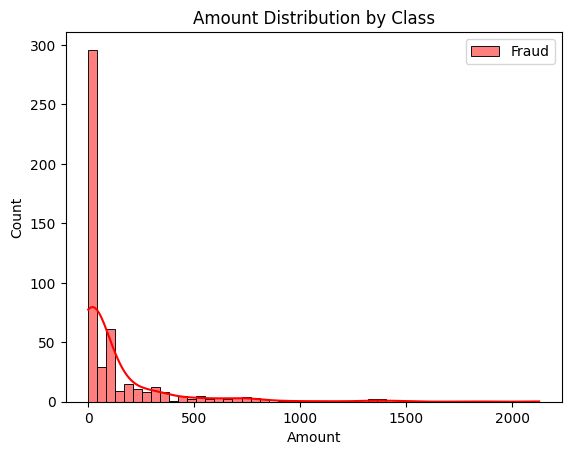

In [ ]:
sns.histplot(df[df["Class"]==1]["Amount"], bins=50, color="red", label="Fraud", kde=True)
plt.legend()
plt.title("Amount Distribution by Class")
plt.show()


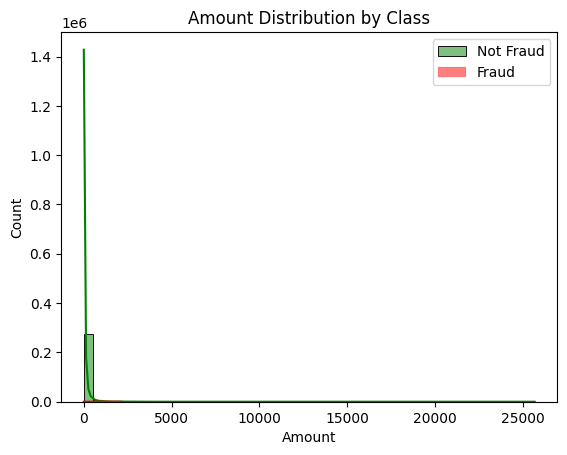

In [ ]:
sns.histplot(df[df["Class"]==0]["Amount"], bins=50, color="green", label="Not Fraud", kde=True)
sns.histplot(df[df["Class"]==1]["Amount"], bins=50, color="red", label="Fraud", kde=True)
plt.legend()
plt.title("Amount Distribution by Class")
plt.show()


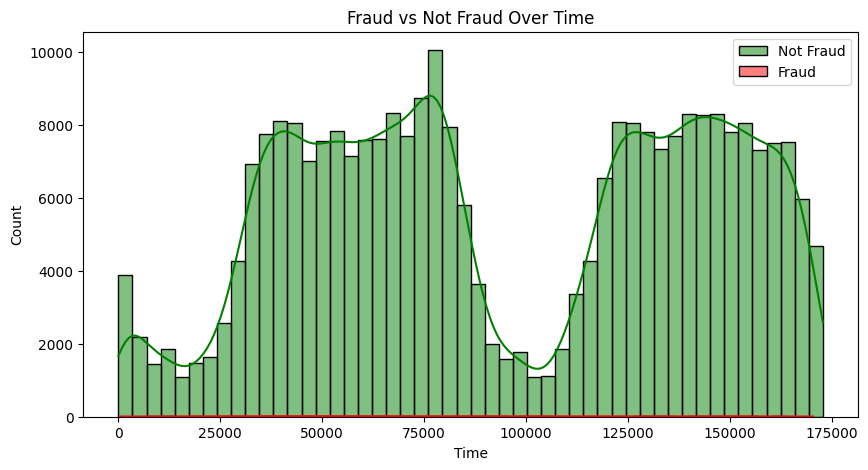

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Class"]==0]["Time"], bins=50, color="green", label="Not Fraud", kde=True)
sns.histplot(df[df["Class"]==1]["Time"], bins=50, color="red", label="Fraud", kde=True)
plt.legend()
plt.title("Fraud vs Not Fraud Over Time")
plt.show()


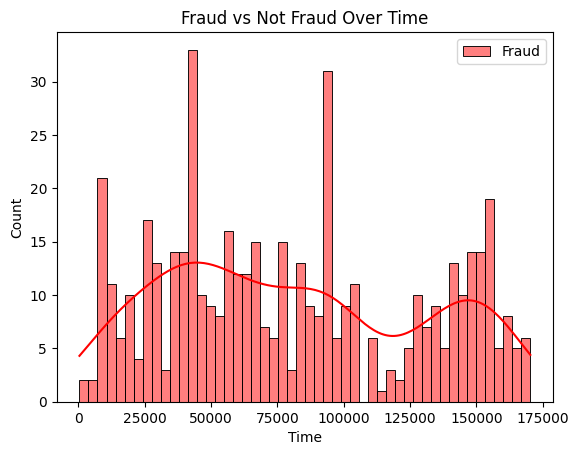

In [ ]:
sns.histplot(df[df["Class"]==1]["Time"], bins=50, color="red", label="Fraud", kde=True)
plt.legend()
plt.title("Fraud vs Not Fraud Over Time")
plt.show()

In [ ]:
scale_cols = [c for c in ["Amount", "Time"] if c in X_train.columns]
scaler = None
if scale_cols:
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_val_scaled   = X_val.copy()
    X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
    X_val_scaled[scale_cols]   = scaler.transform(X_val[scale_cols])
else:

    X_train_scaled = X_train.copy()
    X_val_scaled   = X_val.copy()

In [ ]:
X_tr = X_train_scaled.values.astype("float32")
X_va = X_val_scaled.values.astype("float32")
y_tr = y_train.astype("float32")
y_va = y_val.astype("float32")

In [ ]:
neg = (y_tr == 0).sum()
pos = (y_tr == 1).sum()
total = neg + pos
# Balanced heuristic: each class contributes ~0.5 to loss
weight_for_0 = (1.0 / max(neg, 1)) * (total / 2.0)
weight_for_1 = (1.0 / max(pos, 1)) * (total / 2.0)
class_weights = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights => 0: {weight_for_0:.4f}, 1: 300 | pos rate: {pos/total:.5f}")

Class weights => 0: 0.5009, 1: 300 | pos rate: 0.00183


# **Training and Evaluation using ANN**

## Training

In [ ]:
tf.keras.utils.set_random_seed(42)

model = models.Sequential([
    layers.Input(shape=(X_tr.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(32,activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adagrad(1e-3),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.AUC(curve="PR", name="pr_auc"),
        tf.keras.metrics.AUC(curve="ROC", name="roc_auc")
    ]
)

es = tf.keras.callbacks.EarlyStopping(
    monitor="val_pr_auc", mode="max", patience=6,
    restore_best_weights=True
)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,457 (56.47 KB)

 Trainable params: 14,397 (56.24 KB)

 Non-trainable params: 60 (240.00 B)

In [ ]:
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=60,
    batch_size=1024,
    class_weight=class_weights,
    callbacks=[es],
    verbose=1,

)

Epoch 1/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.6353 - pr_auc: 0.0161 - roc_auc: 0.7000 - val_loss: 0.8566 - val_pr_auc: 0.6857 - val_roc_auc: 0.9635
Epoch 2/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4536 - pr_auc: 0.2124 - roc_auc: 0.8958 - val_loss: 0.7068 - val_pr_auc: 0.7651 - val_roc_auc: 0.9768
Epoch 3/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3825 - pr_auc: 0.2974 - roc_auc: 0.9365 - val_loss: 0.5895 - val_pr_auc: 0.7783 - val_roc_auc: 0.9820
Epoch 4/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3385 - pr_auc: 0.4088 - roc_auc: 0.9494 - val_loss: 0.5008 - val_pr_auc: 0.7845 - val_roc_auc: 0.9842
Epoch 5/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2981 - pr_auc: 0.5059 - roc_auc: 0.9617 - val_loss: 0.4312 - val_pr_auc: 0.7909 - val_roc_auc: 0.9857
Epoch 6/60
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2760 - pr_auc: 0.5159 - roc_auc: 0.9628 - val_loss: 0.3786 - val_pr_auc: 0.7931 - val_roc_auc: 0.9866
Epoch 7/60
223

## Evaluation

In [ ]:
proba = model.predict(X_va, verbose=0).ravel()
pr_auc = average_precision_score(y_va, proba)
rocauc = roc_auc_score(y_va, proba)
prec, rec, thr = precision_recall_curve(y_va, proba)

# Choose operating point: maximize F-beta (β>1 favors recall)
beta = 2.0
f_beta = (1+beta**2) * (prec[:-1]*rec[:-1]) / (beta**2 * prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.argmax(f_beta)
best_thr = thr[best_idx]
yhat = (proba >= best_thr).astype(int)

cm = confusion_matrix(y_va, yhat, labels=[0,1])
print("\n=== Validation metrics (original imbalanced split) ===")
print(f"PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"ROC-AUC: {rocauc:.4f}")
print(f"Best F{beta:.0f} at thr={best_thr:.5f}: {f_beta[best_idx]:.4f}")
print("Confusion matrix [[TN FP], [FN TP]]:\n", cm)
print(classification_report(y_va, yhat, digits=4))

# Recall at low False Positive Rate (e.g., 0.5%)
fpr, tpr, roc_thr = roc_curve(y_va, proba)
target_fpr = 0.005
closest = np.argmin(np.abs(fpr - target_fpr))
thr_at_fpr = roc_thr[closest] if closest < len(roc_thr) else best_thr
rec_at_low_fpr = tpr[closest]
print(f"Recall @ FPR ≈ {target_fpr*100:.2f}%: {rec_at_low_fpr:.4f} (thr={thr_at_fpr:.5f})")


=== Validation metrics (original imbalanced split) ===
PR-AUC (Average Precision): 0.8059
ROC-AUC: 0.9879
Best F2 at thr=0.98600: 0.7917
Confusion matrix [[TN FP], [FN TP]]:
 [[56884     3]
 [   18    57]]
              precision    recall  f1-score   support

         0.0     0.9997    0.9999    0.9998     56887
         1.0     0.9500    0.7600    0.8444        75

    accuracy                         0.9996     56962
   macro avg     0.9748    0.8800    0.9221     56962
weighted avg     0.9996    0.9996    0.9996     56962

Recall @ FPR ≈ 0.50%: 0.8533 (thr=0.86700)


## Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score, fbeta_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores, pr_scores, f2_scores = [], [], []
X_np = X.values if hasattr(X, "values") else np.array(X)
y_np = y.values if hasattr(y, "values") else np.array(y)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_np, y_np)):
    X_train, X_val = X_np[train_idx], X_np[val_idx]
    y_train, y_val = y_np[train_idx], y_np[val_idx]

    # Build and train ANN

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20, batch_size=1024,
                        verbose=0, class_weight={0:1, 1:300})  # adjust for imbalance

    # Predictions
    y_proba = model.predict(X_val).ravel()
    y_pred = (y_proba >= 0.986).astype(int)  # later tune threshold

    # Metrics
    roc = roc_auc_score(y_val, y_proba)
    pr = average_precision_score(y_val, y_proba)
    f2 = fbeta_score(y_val, y_pred, beta=2)

    roc_scores.append(roc)
    pr_scores.append(pr)
    f2_scores.append(f2)

    print(f"Fold {fold+1}: ROC-AUC={roc:.4f}, PR-AUC={pr:.4f}, F2={f2:.4f}")

print("\n=== Cross-Validation Results ===")
print(f"ROC-AUC: {np.mean(roc_scores):.4f} ± {np.std(roc_scores):.4f}")
print(f"PR-AUC:  {np.mean(pr_scores):.4f} ± {np.std(pr_scores):.4f}")
print(f"F2:      {np.mean(f2_scores):.4f} ± {np.std(f2_scores):.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 1: ROC-AUC=0.9825, PR-AUC=0.7040, F2=0.7863
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fold 2: ROC-AUC=0.9831, PR-AUC=0.6935, F2=0.8180
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fold 3: ROC-AUC=0.9932, PR-AUC=0.7258, F2=0.8197
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 4: ROC-AUC=0.9784, PR-AUC=0.7660, F2=0.8025
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fold 5: ROC-AUC=0.9886, PR-AUC=0.7002, F2=0.8130

=== Cross-Validation Results ===
ROC-AUC: 0.9852 ± 0.0052
PR-AUC:  0.7179 ± 0.0264
F2:      0.8079 ± 0.0124


## Curves

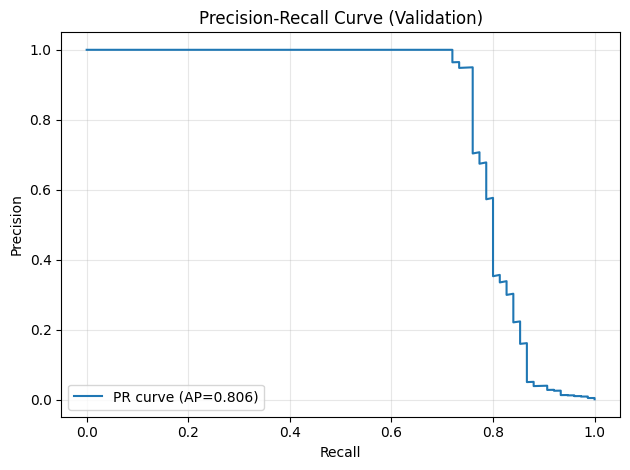

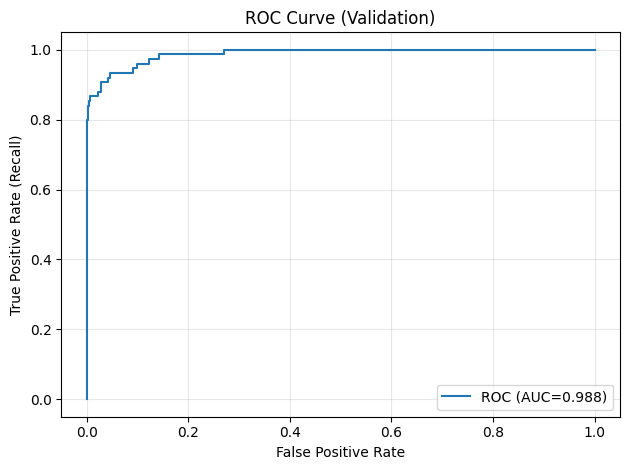

In [ ]:
plt.figure()
plt.plot(rec, prec, label=f"PR curve (AP={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Validation)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={rocauc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (Validation)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


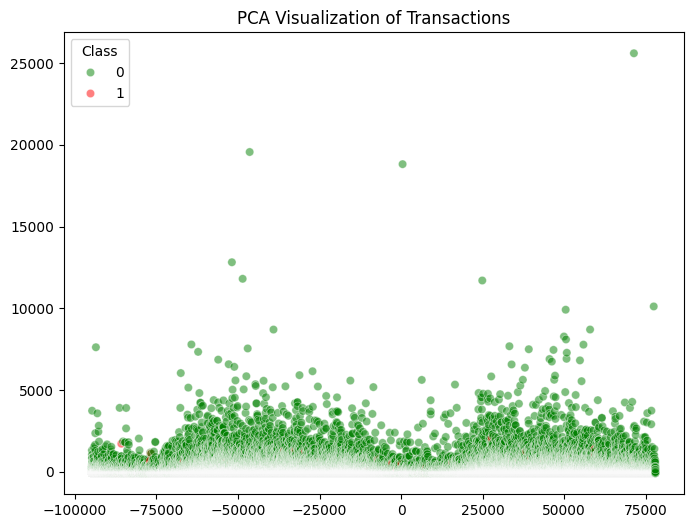

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=["Class"]))

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["Class"], palette=["green","red"], alpha=0.5)
plt.title("PCA Visualization of Transactions")
plt.show()


# **Training and Evaluation using XGBoost**

## XGBoosting

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, average_precision_score

# 1. Calculate the scaling weight
# Formula: total_negative_examples / total_positive_examples
negative_cases = (y == 0).sum()
positive_cases = (y == 1).sum()
scale_weight = negative_cases / positive_cases


# 3. Initialize XGBoost with balance handling
from sklearn.metrics import precision_score,recall_score,f1_score
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=12,
    learning_rate=0.1,
    scale_pos_weight=scale_weight,  # Crucial for imbalanced data
    use_label_encoder=False,
    eval_metric='aucpr'             # Optimize for Area Under Precision-Recall
)

# 4. Fit the model
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_va)
print(classification_report(y_va, y_pred))
print(f"AUPRC Score: {average_precision_score(y_va, model.predict_proba(X_va)[:, 1])}")
print(f"Precision: {precision_score(y_va,y_pred)}")
print(f"Recall: {recall_score(y_va,y_pred)}")
print(f"f2_score: {f1_score(y_va,y_pred)}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:20:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56887
         1.0       0.86      0.75      0.80        75

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC Score: 0.7910231092245532
Precision: 0.8615384615384616
Precision: 0.7466666666666667
Precision: 0.8


## XGBoost + SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, average_precision_score

# 1. Apply SMOTE to training data only
# sampling_strategy=0.1 means fraud will become 10% of the majority class size
sm = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 2. Initialize XGBoost
# We remove scale_pos_weight because SMOTE has already balanced the classes
xgb_smote = XGBClassifier(
    n_estimators=500,
    max_depth=15,
    learning_rate=0.1,
    verbosity=1,
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist' # Speeds up training on resampled data
)

# 3. Fit the model
xgb_smote.fit(X_train_res, y_train_res)

# 4. Evaluate on the original (imbalanced) test set
y_probs = xgb_smote.predict_proba(X_va)[:, 1]
y_pred = (y_probs > 0.5).astype(int)

print("--- XGBoost + SMOTE Results ---")
print(classification_report(y_va, y_pred))
print(f"PR-AUC Score: {average_precision_score(y_va, y_probs):.4f}")

--- XGBoost + SMOTE Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.84      0.77      0.81        75

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

PR-AUC Score: 0.8110


# **Hyperparameter Tuning**

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score, make_scorer

# 1. Define the Pipeline
# This ensures SMOTE is ONLY applied to the training folds, not validation
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(objective='binary:logistic', eval_metric='aucpr', random_state=42))
])

# 2. Define the Parameter Grid
# Note the prefix 'xgb__' to tell the pipeline which step these belong to
param_grid = {
    'smote__sampling_strategy': [0.1, 0.3], # Ratio of fraud to legitimate
    'xgb__max_depth': [5, 10, 15],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__n_estimators': [100, 500, 700],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__min_child_weight': [1, 5, 10]
}

from sklearn.model_selection import StratifiedKFold

# 1. Use StratifiedKFold to ensure fraud cases are in every fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 2. Fix the Scorer
# 'response_method' ensures it pulls the probability (predict_proba)
pr_auc_scorer = make_scorer(average_precision_score, response_method="predict_proba")

# 3. Update Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring=pr_auc_scorer,
    cv=skf,                 # Use the stratified folds here
    verbose=3,              # Higher verbosity helps see which fit fails
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best Score (PR-AUC): {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Score (PR-AUC): 0.8647
Best Parameters: {'xgb__subsample': 1.0, 'xgb__n_estimators': 500, 'xgb__min_child_weight': 5, 'xgb__max_depth': 15, 'xgb__learning_rate': 0.2, 'smote__sampling_strategy': 0.3}


## Evaluation Using Hyperparameter Tuning Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Extract the best model from the search
best_model = random_search.best_estimator_

# 2. Predict on the test set
# We use the test set that the model NEVER saw during tuning
y_pred = best_model.predict(X_va)
y_probs = best_model.predict_proba(X_va)[:, 1]

# 3. Print the report
print("\n--- Final Classification Report ---")
print(classification_report(y_va, y_pred))

# 4. Print the final PR-AUC for comparison
final_pr_auc = average_precision_score(y_va, y_probs)
print(f"Final Test PR-AUC: {final_pr_auc:.4f}")


--- Final Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.82      0.79      0.80        75

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Final Test PR-AUC: 0.8036
